# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Plan de solución:
* Realizaré una exploración inicial de los archivos .csv para identificar las herramientas y métodos que serán necesarios para interpretar la información correctamente.
* Aplicaré diferentes métodos para leer los datos; esto me permitirá identificar la naturaleza de los datos con los que estaré trabajando durante el proyecto y detectar cualquier valor ausente en los mismos.

In [163]:
# importar librerías

import pandas as pd

In [164]:
# leer conjuntos de datos en los DataFrames

instacart_orders = pd.read_csv(r'C:\Users\Lorenzo\Desktop\ORDER_L8R\Data_Analysis\TripleTen\Datasets\instacart_orders.csv', sep=';')
products = pd.read_csv(r'C:\Users\Lorenzo\Desktop\ORDER_L8R\Data_Analysis\TripleTen\Datasets\products.csv', sep=';')
aisles = pd.read_csv(r'C:\Users\Lorenzo\Desktop\ORDER_L8R\Data_Analysis\TripleTen\Datasets\aisles.csv', sep=';')
departments = pd.read_csv(r'C:\Users\Lorenzo\Desktop\ORDER_L8R\Data_Analysis\TripleTen\Datasets\departments.csv', sep=';')
order_products = pd.read_csv(r'C:\Users\Lorenzo\Desktop\ORDER_L8R\Data_Analysis\TripleTen\Datasets\order_products.csv', sep=';')

In [165]:
# mostrar información del DataFrame

instacart_orders.info()
print()
display(instacart_orders.head())
print()
display(instacart_orders.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
76356,3307868,79525,49,4,15,6.0
44194,3297918,109095,25,2,12,3.0
157681,1471822,81140,25,5,7,1.0
83358,1581519,187340,38,1,17,2.0
369482,833710,162898,25,5,11,2.0


In [166]:
# mostrar información del DataFrame

products.info()
print()
display(products.head())
print()
display(products.sample(5))
print()
print(products['product_name'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


,product_id,product_name,aisle_id,department_id
14926,14927,Blueberry,24,4
9266,9267,Muffin & Cake Mix- Almond Flour- Chocolate,17,13
8451,8452,Wild Blueberry Supreme Muffin Mix,105,13
25372,25373,NOTICEables Dual Scented Oil Refill + Free War...,101,17
1628,1629,Migraine Caplets,133,11



count                          48436
unique                         48436
top       Chocolate Sandwich Cookies
freq                               1
Name: product_name, dtype: object


In [167]:
# mostrar información del DataFrame

aisles.info()
print()
print(aisles.head())
print()
print(aisles.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

    aisle_id              aisle
89        90  cocoa drink mixes
92        93   breakfast bakery
48        49   packaged poultry
42        43         buns rolls
75        76       indian foods


In [168]:
# mostrar información del DataFrame

departments.info()
print()
print(departments.head())
print()
print(departments.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

    department_id  department
4               5     alcohol
12             13      pantry
7               8        pets
20             21     missing
15             16  dairy eggs


In [169]:
# mostrar información del DataFrame

order_products.info(show_counts=True)
print()
display(order_products.head())
print()
display(order_products.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


,order_id,product_id,add_to_cart_order,reordered
2969294,2528214,29189,2.0,0
3045667,1728678,5450,2.0,1
920801,1609851,22312,9.0,0
2265179,791212,10655,3.0,1
2760128,238351,27845,4.0,1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Los valores en los archivos estan separados por punto y coma (';'), por lo tanto se aplicó el metodo sep=';' al leer los archivos con pd.read_csv().

Los DataFrames parecen estar bastante limpios y bien estructurados, con solo unas pocas columnas que presentan valores nulos.

* La columna **days_since_prior_order** en DataFrame **instacart_orders** tiene valores nulos que necesitarán ser manejados.
* La columna **product_name** en DataFrame **products** tiene valores nulos que necesitarán ser manejados.
* Todos los campos en DataFrame **aisles** y DataFrame **departments** están completos y consistentes.
* La columna **add_to_cart_order** en DataFrame **order_products** tiene valores nulos que necesitarán ser manejados.
    

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Plan de solución:
* Empezaré identificando y tratando valores ausentes y duplicados en los conjuntos de datos para asegurar la calidad y precisión de la información.
* Analizaré las características de cada columna para determinar si es necesario realizar alguna transformación.
* Finalmente, modificare los conjuntos de datos según sea necesario para facilitar el análisis posterior, asegurándome de mantener la integridad de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [170]:
# Revisa si hay pedidos duplicados

duplicados = instacart_orders['order_id'].value_counts()
duplicados = duplicados[duplicados > 1]
print(duplicados)


order_id
2282673    2
467134     2
1286742    2
2232988    2
1021560    2
1919531    2
408114     2
391768     2
1918001    2
1112182    2
794638     2
2125197    2
1782114    2
2845099    2
2160484    2
Name: count, dtype: int64


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Hay 15 lineas duplicadas; se puede observar un patron en el dia de la semana y la hora del dia.

In [171]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

pedidos_miercoles_2am = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
display(pedidos_miercoles_2am)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

 El resultado sugiere la posibilidad de que haya un patrón o irregularidad en los pedidos realizados el miércoles a las 2:00 a.m.

In [172]:
# Elimina los pedidos duplicados

instacart_orders.drop_duplicates(subset='order_id', keep='first', inplace=True)

In [173]:
# Vuelve a verificar si hay filas duplicadas

print(instacart_orders.duplicated().sum())

0


In [174]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print(instacart_orders['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Como se menciono anteriormente, se encontraron 15 lineas duplicadas y se eliminaron. Tambien se observo un posible patron donde se repetia el dia de la semana y la hora del dia en 106 lineas. Sin embargo, se necesitaria realizar investigación adicional para poder averiguar si es algo relacionado con el  comportamiento del usuario, la calidad de los datos, o el sistema de procesamiento de pedidos.

### `products` data frame

In [175]:
# Verifica si hay filas totalmente duplicadas

print(products.duplicated().sum())

0


In [176]:
# Verifica únicamente si hay IDs duplicadas de productos

print(products['product_id'].duplicated().sum())

0


In [177]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

print(products['product_name'].str.upper().duplicated().sum())

1361


In [178]:
# Revisa si hay nombres duplicados de productos no faltantes

print(products['product_name'].dropna().str.upper().duplicated().sum())

product_name_nan_count = products['product_name'].isna().sum()
print(product_name_nan_count)

104
1258


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hallazgos:
* No se encontraron filas completamente duplicadas en el dataframe products.
* Tampoco se encontraron IDs de productos duplicados.
* Al convertir los nombres de los productos a letras mayúsculas y verificar duplicados, se encontraron 104 nombres de productos duplicados.
* Al excluir los nombres de productos faltantes y volver a verificar los duplicados, se encontraron 1258 nombres de productos duplicados.
* Se identificaron 1258 valores ausentes en la columna product_name.

Acciones tomadas:
* Se identificaron y contabilizaron las duplicidades en los datos, tanto en términos de IDs de productos como de nombres de productos.
* Se identificaron valores ausentes en la columna product_name.

### `departments` data frame

In [179]:
# Revisa si hay filas totalmente duplicadas

print(departments.duplicated().sum())

0


In [180]:
# Revisa únicamente si hay IDs duplicadas de productos

print(departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hallazgos:
* No se encontraron filas completamente duplicadas en el dataframe departments.
* Tampoco se encontraron IDs de departamentos duplicados en el dataframe departments.

Acciones tomadas:
* Se verificó la integridad de los datos en el dataframe departments y se confirmó que no hay duplicados.

### `aisles` data frame

In [181]:
# Revisa si hay filas totalmente duplicadas

print(aisles.duplicated().sum())

0


In [182]:
# Revisa únicamente si hay IDs duplicadas de productos

print(aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hallazgos:
* No se encontraron filas completamente duplicadas en el dataframe aisles.
* Tampoco se encontraron IDs de pasillos (aisles) duplicados en el dataframe aisles.

Acciones tomadas:
* Se verificó la integridad de los datos en el dataframe aisles, y se confirmó que no hay duplicados.

### `order_products` data frame

In [183]:
# Revisa si hay filas totalmente duplicadas

print(order_products.duplicated().sum())

0


In [184]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

print(order_products.duplicated(subset=['order_id', 'product_id']).sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.


Hallazgos:
* No se encontraron filas completamente duplicadas en el dataframe order_products.
* Al verificar posibles duplicados "engañosos" basados en combinaciones de 'order_id' y 'product_id', tampoco se encontraron duplicados.

Acciones tomadas:
* Se realizó una revisión exhaustiva de los datos en el dataframe order_products para asegurar que no existieran duplicados, ya sea en su totalidad o en combinaciones específicas de 'order_id' y 'product_id'.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [185]:
# Encuentra los valores ausentes en la columna 'product_name'

print(products['product_name'].isnull().sum())

1258


Describe brevemente cuáles son tus hallazgos.

Hallazgos:
* Se identificaron 1,258 valores ausentes en la columna 'product_name' del dataframe products.

In [186]:
# ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

missing_product_names = products[products['product_name'].isnull()]
print((missing_product_names['aisle_id'] == 100).all())

True


Describe brevemente cuáles son tus hallazgos.

Hallazgos:
* Todos los productos con nombres ausentes están asociados con el pasillo con ID 100.

In [187]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

missing_product_names = products[products['product_name'].isnull()]
print((missing_product_names['department_id'] == 21).all())

True


Describe brevemente cuáles son tus hallazgos.

Hallazgos:
* Todos los productos con nombres ausentes están asociados con el departamento con ID 21.

In [188]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

aisle_100 = aisles[aisles['aisle_id'] == 100]
print(aisle_100)
print()
department_21 = departments[departments['department_id'] == 21]
print(department_21)

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

Hallazgos:
* El pasillo con ID 100 tiene el nombre "missing".
* El departamento con ID 21 también tiene el nombre "missing".

El "missing" en estas tablas podría indicar que hay ciertos productos en el conjunto de datos para los cuales no se ha registrado adecuadamente la información del pasillo o del departamento, o que no está disponible por alguna razón.

In [189]:
# Completa los nombres de productos ausentes con 'Unknown'

products['product_name'].fillna('Unknown', inplace=True)
print(products['product_name'].isnull().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hallazgos:
* Todos los valores ausentes en la columna 'product_name' han sido reemplazados con la etiqueta 'Unknown'.

Acciones tomadas:
* Para garantizar la integridad de los datos y facilitar el análisis, se reemplazaron los valores ausentes en la columna 'product_name' con la etiqueta 'Unknown'. Esto permite que los análisis y visualizaciones que involucran esta columna sean más claros y no se vean afectados por la falta de nombres de productos.

### `orders` data frame

In [190]:
# Encuentra los valores ausentes
# No hay un DataFrame con el nombre 'orders'.

In [191]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [192]:
# Encuentra los valores ausentes

print(order_products.isnull().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [193]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

Hallazgos:
* En el dataframe order_products, hay 836 valores ausentes en la columna 'add_to_cart_order'.
* Los valores en la columna 'add_to_cart_order' oscilan entre 1 y 64.

In [194]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

missing_order_ids = order_products.loc[order_products['add_to_cart_order'].isnull(), 'order_id']
print(missing_order_ids)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [195]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Si

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

print(order_products.groupby('order_id')['product_id'].count().min())

1


Describe brevemente cuáles son tus hallazgos.

Hallazgos:
* Hay 836 IDs de pedidos en el dataframe order_products que tienen valores ausentes en la columna 'add_to_cart_order'.
* Al revisar la cantidad de productos en cada pedido, se encontró que el pedido con la menor cantidad de productos tiene solo 1 producto.

In [196]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.

order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hallazgos:
* Existían valores ausentes en la columna 'add_to_cart_order' del dataframe order_products.

Acciones tomadas:
* Se reemplazaron todos los valores ausentes en la columna 'add_to_cart_order' con el valor 999.
* Posteriormente, se convirtió la columna 'add_to_cart_order' al tipo de dato entero.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

* Se llevó a cabo una exploración detallada de los conjuntos de datos proporcionados. Esta exploración nos permitió identificar la estructura, las características y la naturaleza de los datos con los que estábamos trabajando.
* Se identificaron y manejaron los duplicados en varios dataframes. En la mayoría de los casos, no se encontraron duplicados, lo que indica una buena calidad inicial de los datos.
* Se detectaron valores ausentes en ciertas columnas de los dataframes, como 'product_name' y 'add_to_cart_order'. Estos valores ausentes se manejaron adecuadamente, ya sea completándolos con valores específicos o identificando su naturaleza y relación con otros datos.
* Se verificó la consistencia de los datos en varias columnas, como 'order_hour_of_day' y 'order_dow', para asegurarse de que los valores estuvieran dentro de los rangos esperados.
* Se realizaron conversiones de tipos de datos en ciertas columnas para garantizar la coherencia y facilitar el análisis posterior.
* Se identificaron relaciones entre diferentes dataframes, como la relación entre 'product_name' ausente y los pasillos y departamentos etiquetados como 'missing'.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [197]:
min_hour = instacart_orders['order_hour_of_day'].min()
max_hour = instacart_orders['order_hour_of_day'].max()

print(min_hour >= 0 and max_hour <= 23)

True


In [198]:
min_dow = instacart_orders['order_dow'].min()
max_dow = instacart_orders['order_dow'].max()

print(min_dow >= 0 and max_dow <= 6)

True


Escribe aquí tus conclusiones

* Al revisar la columna 'order_hour_of_day' del dataframe instacart_orders, se confirmó que todos los valores están dentro del rango esperado de 0 a 23. Esto indica que los datos de la hora del día en que se realizan los pedidos son consistentes y no contienen valores atípicos o erróneos.

* Al analizar la columna 'order_dow', se verificó que todos los valores están dentro del rango esperado de 0 a 6, lo que representa los días de la semana desde el domingo (0) hasta el sábado (6). Esto confirma que los datos relacionados con el día de la semana en que se realizan los pedidos son coherentes y precisos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [199]:

orders_per_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].nunique()
print(orders_per_hour)

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64


Escribe aquí tus conclusiones

* El resultado indica que la mayoría de los usuarios prefieren hacer sus pedidos durante el día, especialmente alrededor del mediodía.


### [A3] ¿Qué día de la semana compran víveres las personas?

In [200]:

orders_per_day = instacart_orders.groupby('order_dow')['user_id'].nunique()
print(orders_per_day)

order_dow
0    57661
1    56479
2    48587
3    45331
4    44281
5    46127
6    45604
Name: user_id, dtype: int64


Escribe aquí tus conclusiones

* El Domingo y el Lunes son los días con más actividad.
* El Miércoles y el Jueves son los días con menor actividad.
* Los otros días de la semana muestran una actividad consistente.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [201]:

min_days = instacart_orders['days_since_prior_order'].min()
max_days = instacart_orders['days_since_prior_order'].max()
print(min_days)
print(max_days)
print()
average_days = instacart_orders['days_since_prior_order'].mean()
print(average_days)

0.0
30.0

11.101813900274362


Escribe aquí tus conclusiones

* Al examinar la columna 'days_since_prior_order' del dataframe instacart_orders, se observa que los valores oscilan entre 0 y 30 días. Esto sugiere que los clientes realizan pedidos con una frecuencia que varía desde el mismo día hasta un mes después de su último pedido.

* El tiempo promedio que los clientes esperan antes de realizar otro pedido en Instacart es de aproximadamente 11.1 días. Esto indica que, en promedio, los clientes tienden a hacer un pedido cada 11 días.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

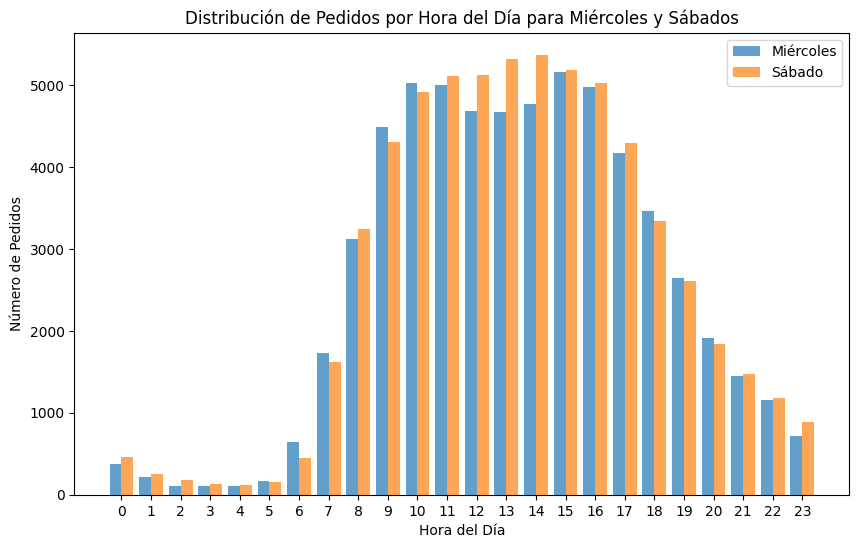

In [202]:
import matplotlib.pyplot as plt

wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 6]

wednesday_distribution = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_distribution = saturday_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(wednesday_distribution.index - 0.2, wednesday_distribution.values, width=0.4, label='Miércoles', alpha=0.7)
plt.bar(saturday_distribution.index + 0.2, saturday_distribution.values, width=0.4, label='Sábado', alpha=0.7)
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.title('Distribución de Pedidos por Hora del Día para Miércoles y Sábados')
plt.xticks(range(24))
plt.legend()
plt.show()

Escribe aquí tus conclusiones

* Al analizar la distribución de pedidos por hora del día para los miércoles y sábados, se identifican patrones consistentes en la actividad de pedidos en ambos días. Sin embargo, hay diferencias notables en las horas pico de actividad, particularmente entre las 12:00 y las 14:00.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

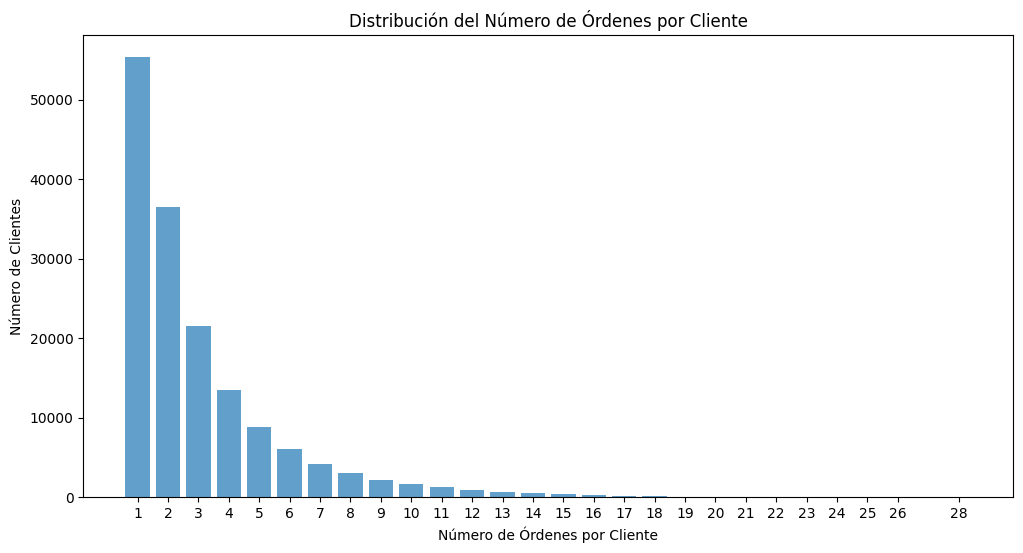

In [203]:
import matplotlib.pyplot as plt

order_counts_per_user = instacart_orders.groupby('user_id')['order_id'].count()
order_distribution = order_counts_per_user.value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(order_distribution.index, order_distribution.values, alpha=0.7)
plt.xlabel('Número de Órdenes por Cliente')
plt.ylabel('Número de Clientes')
plt.title('Distribución del Número de Órdenes por Cliente')
plt.xticks(order_distribution.index)
plt.show()

Escribe aquí tus conclusiones

* Una gran proporción de clientes ha realizado solo una compra, como lo indica la barra más alta en el extremo izquierdo del gráfico. Esto sugiere que hay muchos clientes que prueban el servicio pero no regresan para una segunda compra.
* A medida que aumenta el número de órdenes por cliente, el número de clientes que realizan ese número específico de órdenes disminuye progresivamente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

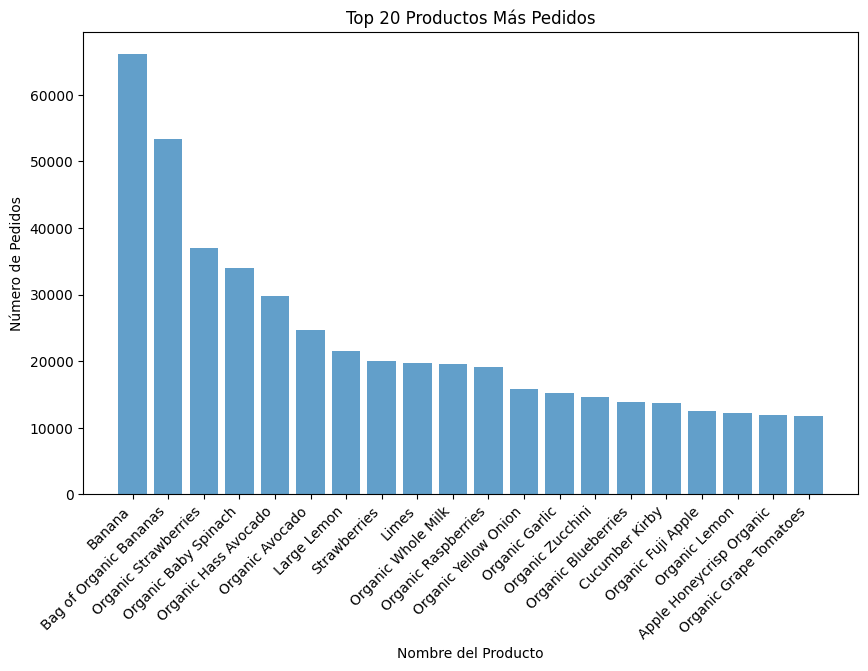

In [204]:
import matplotlib.pyplot as plt

top_products_ids = order_products['product_id'].value_counts().head(20).index
top_products = products[products['product_id'].isin(top_products_ids)]
top_products = top_products.set_index('product_id').loc[top_products_ids].reset_index()

plt.figure(figsize=(10,6))
plt.bar(top_products['product_name'], order_products['product_id'].value_counts().head(20).values, alpha=0.7)
plt.xlabel('Nombre del Producto')
plt.ylabel('Número de Pedidos')
plt.title('Top 20 Productos Más Pedidos')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [205]:
display(top_products)

,product_id,product_name,aisle_id,department_id
0,24852,Banana,24,4
1,13176,Bag of Organic Bananas,24,4
2,21137,Organic Strawberries,24,4
3,21903,Organic Baby Spinach,123,4
4,47209,Organic Hass Avocado,24,4
5,47766,Organic Avocado,24,4
6,47626,Large Lemon,24,4
7,16797,Strawberries,24,4
8,26209,Limes,24,4
9,27845,Organic Whole Milk,84,16


Escribe aquí tus conclusiones

* La mayoría de los productos más pedidos en Instacart son frutas y verduras frescas. Esto indica que los usuarios de Instacart tienden a comprar productos frescos con mayor frecuencia.
* Se observa una prevalencia de productos etiquetados como "orgánicos" en la lista de los 20 productos más pedidos. Esto sugiere una preferencia o tendencia hacia la compra de productos orgánicos entre los usuarios de Instacart.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

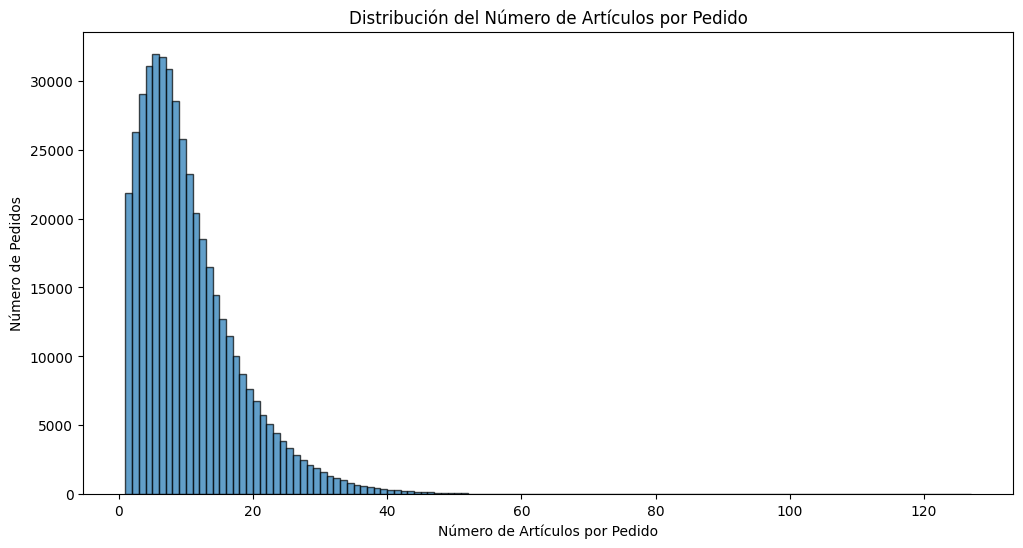

In [206]:
import matplotlib.pyplot as plt

items_per_order = order_products.groupby('order_id')['product_id'].count()

plt.figure(figsize=(12,6))
plt.hist(items_per_order, bins=range(1, items_per_order.max() + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Número de Pedidos')
plt.title('Distribución del Número de Artículos por Pedido')
plt.show()

In [207]:
print('Promedio de artículos que compra la gente en un pedido:', round(items_per_order.mean()))

Promedio de artículos que compra la gente en un pedido: 10


Escribe aquí tus conclusiones

* La mayoría de los pedidos en Instacart contienen una cantidad de artículos que oscila entre 1 y 20. La distribución muestra un pico pronunciado alrededor de 5 artículos por pedido, lo que indica que es común que los usuarios hagan pedidos pequeños.
* El promedio de artículos que la gente compra en un pedido es de 10. Esto refuerza la idea de que la mayoría de los pedidos son relativamente pequeños, aunque hay algunos pedidos que contienen una cantidad significativamente mayor de artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

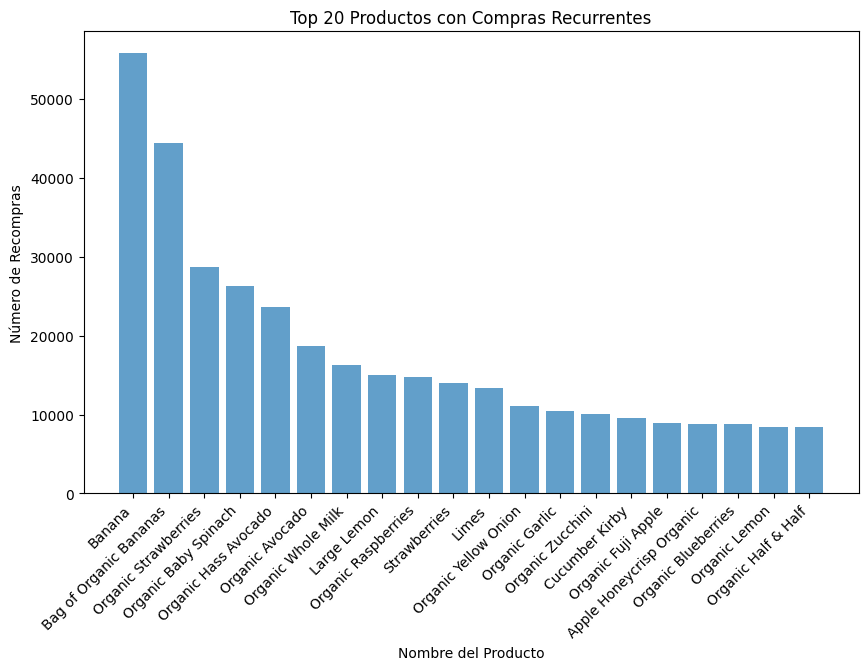

In [208]:
import matplotlib.pyplot as plt

reordered_products = order_products[order_products['reordered'] == 1]

top_reordered_products_ids = reordered_products['product_id'].value_counts().head(20).index
top_reordered_products = products[products['product_id'].isin(top_reordered_products_ids)]
top_reordered_products = top_reordered_products.set_index('product_id').loc[top_reordered_products_ids].reset_index()

plt.figure(figsize=(10,6))
plt.bar(top_reordered_products['product_name'], reordered_products['product_id'].value_counts().head(20).values, alpha=0.7)
plt.xlabel('Nombre del Producto')
plt.ylabel('Número de Recompras')
plt.title('Top 20 Productos con Compras Recurrentes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [209]:
display(top_reordered_products)

,product_id,product_name,aisle_id,department_id
0,24852,Banana,24,4
1,13176,Bag of Organic Bananas,24,4
2,21137,Organic Strawberries,24,4
3,21903,Organic Baby Spinach,123,4
4,47209,Organic Hass Avocado,24,4
5,47766,Organic Avocado,24,4
6,27845,Organic Whole Milk,84,16
7,47626,Large Lemon,24,4
8,27966,Organic Raspberries,123,4
9,16797,Strawberries,24,4


Escribe aquí tus conclusiones

* Los productos que encabezan la lista de los más reordenados son, en su mayoría, productos frescos y básicos, como bananas, fresas y espinacas. Esto indica que los usuarios de Instacart tienden a comprar regularmente estos productos esenciales.
* Una observación notable es la prevalencia de productos etiquetados como "orgánicos" en la lista. Esto sugiere que los usuarios de Instacart tienen una preferencia o inclinación hacia los productos orgánicos, y una vez que prueban estos productos, tienden a reordenarlos.
* La presencia de productos básicos en la lista de los más reordenados sugiere que los usuarios de Instacart son consistentes en sus compras y tienden a comprar los mismos productos básicos con regularidad.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [210]:
total_orders_per_product = order_products['product_id'].value_counts()
reordered_per_product = order_products[order_products['reordered'] == 1]['product_id'].value_counts()
reorder_ratio = reordered_per_product / total_orders_per_product

reorder_ratio_df = reorder_ratio.reset_index()
reorder_ratio_df.columns = ['product_id', 'reorder_ratio']

reorder_ratio_df = reorder_ratio_df.merge(products[['product_id', 'product_name']], on='product_id')

display(reorder_ratio_df.head(10))

,product_id,reorder_ratio,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,NaN,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange
5,8,0.315789,Cut Russet Potatoes Steam N' Mash
6,9,0.761905,Light Strawberry Blueberry Yogurt
7,10,0.448071,Sparkling Orange Juice & Prickly Pear Beverage
8,11,0.625000,Peach Mango Juice
9,12,0.390244,Chocolate Fudge Layer Cake


In [211]:
reorder_ratio_df_sorted = reorder_ratio_df.sort_values(by='reorder_ratio', ascending=False)
display(reorder_ratio_df_sorted.head(10))

,product_id,reorder_ratio,product_name
10973,12038,1.0,for Women Maximum Absorbency L Underwear
1646,1809,1.0,Slow Kettle Style Santa Fe Chicken Enchilada S...
33130,36122,1.0,Spicy Chili Beans
2929,3205,1.0,Original Pure Chocolate Whippet Cookies
38398,41901,1.0,Moisturizing Lotionized Shave Gel with Vitamin E
42526,46398,1.0,Chocolate Animal Crackers
9464,10378,1.0,Honey Flake & Oat Clusters
28455,31026,1.0,Drinkable Yogurt- Mango
42558,46437,1.0,Spinach Saag Medium Indian Simmer Sauce
19043,20787,1.0,West Coast Style Stout


Escribe aquí tus conclusiones

* Al observar los primeros datos, vemos productos como "Chocolate Sandwich Cookies" y "All-Seasons Salt" con ratios de reorden más bajos. Esto podría indicar que estos productos no son esenciales para los clientes o que los clientes prueban estos productos pero no necesariamente los vuelven a comprar con regularidad. Estos productos podrían ser objeto de análisis para entender por qué no son reordenados con frecuencia y si hay oportunidades de mejora.
*  En el segundo conjunto de datos, vemos productos con un ratio de reorden de 1, lo que indica que cada vez que estos productos son comprados, son reordenados. Estos productos, como "for Women Maximum Absorbency L Underwear" y "Slow Kettle Style Santa Fe Chicken Enchilada Soup", podrían ser considerados esenciales o muy satisfactorios para los clientes, ya que tienden a comprarlos repetidamente.
* Hay una amplia variedad de productos en la lista, desde alimentos y bebidas hasta productos de cuidado personal. Esto muestra la diversidad de productos que los clientes tienden a reordenar.


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [212]:
merged_df = order_products.merge(instacart_orders, on='order_id', how='left')
reorder_prop_by_user = merged_df.groupby('user_id')['reordered'].mean()
print(reorder_prop_by_user.head(20))

user_id
2     0.038462
4     0.000000
5     0.666667
6     0.000000
7     0.928571
11    0.200000
12    0.250000
13    0.565217
14    0.360656
15    0.538462
16    0.531250
17    0.716981
19    0.291667
20    0.000000
21    0.400000
22    1.000000
24    0.500000
26    0.437500
27    0.658824
28    0.500000
Name: reordered, dtype: float64


Escribe aquí tus conclusiones

* Hay una amplia variación en las proporciones de reorden entre los usuarios. Mientras algunos usuarios, como el user_id 4 y 6, no han reordenado ningún producto, otros, como el user_id 7 y 22, tienen proporciones de reorden muy altas, cercanas al 93% y 100% respectivamente.
* Usuarios con proporciones de reorden altas, como el user_id 7, indican una fuerte lealtad hacia ciertos productos o marcas. Estos usuarios tienden a comprar los mismos productos repetidamente, lo que sugiere que están satisfechos con esos productos o que son esenciales para ellos.
* Por otro lado, usuarios con proporciones de reorden bajas o nulas, como el user_id 4, podrían estar probando diferentes productos cada vez que hacen un pedido. También es posible que estos usuarios no compren con frecuencia y, por lo tanto, no tienen la necesidad de reordenar.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [213]:
top_20_first_in_cart = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20).index
top_20_first_products = products[products['product_id'].isin(top_20_first_in_cart)]
display(top_20_first_products)

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
5784,5785,Organic Reduced Fat 2% Milk,84,16
12340,12341,Hass Avocados,32,4
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
19659,19660,Spring Water,115,7
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4


Escribe aquí tus conclusiones

* La mayoría de los productos en el top 20 que las personas ponen primero en sus carritos son productos frescos, especialmente frutas y verduras como "Banana", "Organic Strawberries", "Limes", "Organic Hass Avocado", entre otros. Esto sugiere que los usuarios tienden a comenzar sus compras seleccionando productos frescos.
* Además de los productos frescos, los productos lácteos como "Organic Whole Milk", "Organic Reduced Fat 2% Milk", "Half & Half", y "Organic Half & Half" también son populares como primeras elecciones. Esto podría indicar una preferencia o necesidad básica de estos productos en la dieta de los usuarios.
* Hay una inclinación hacia los productos orgánicos en la lista. Esto refleja una creciente conciencia y preferencia por los alimentos orgánicos entre los consumidores.

### Conclusion general del proyecto:

A lo largo de este proyecto, se ha llevado a cabo un análisis exhaustivo de los datos proporcionados por Instacart, una plataforma de comercio electrónico centrada en la entrega a domicilio. A través de la exploración, preprocesamiento y análisis de los datos, se ha obtenido información valiosa:

* Los datos, en su mayoría, estaban bien estructurados y limpios. Sin embargo, se identificaron y manejaron ciertas inconsistencias, como valores ausentes y duplicados.
* Se observó que hay una tendencia significativa de clientes que prueban el servicio una vez pero no regresan para futuras compras. Sin embargo, también hay un grupo leal de clientes que ha realizado múltiples pedidos.
* Los productos más pedidos y reordenados tienden a ser básicos y esenciales, como bananas, fresas y espinacas. Esto sugiere que los clientes confían en la plataforma principalmente para sus necesidades básicas
* Las horas pico de pedidos son durante las mañanas y las tardes, mientras que los días más populares para hacer pedidos son los domingos y los lunes. 
* Se analizó la proporción de reordenación de productos, lo que dio una idea de qué productos tienen una alta tasa de reordenes entre los clientes.
* En promedio, los clientes tienden a comprar alrededor de 10 artículos por pedido. Además, hay ciertos productos que los clientes tienden a agregar primero a sus carritos, lo que podría indicar la importancia o prioridad de esos productos para ellos.

Estos hallazgos pueden ser utilizados por la empresa para mejorar su servicio, optimizar sus operaciones y desarrollar estrategias de marketing más efectivas.